<a href="https://colab.research.google.com/github/chaizhang/hotel_booking_cancellations/blob/main/results/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
! git clone https://github.com/chaizhang/hotel_booking_cancellations

fatal: destination path 'hotel_booking_cancellations' already exists and is not an empty directory.


In [14]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
data  = pd.read_csv('hotel_booking_cancellations/data/cleaned_hotel_booking.csv')

In [16]:
data['children'].fillna(0, inplace=True)
data['country'].fillna('Unknown', inplace=True)
data.drop(['arrival_date'], axis=1, inplace=True)
data.drop(['reservation_status'], axis=1, inplace=True)
categorical_columns = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel', 'deposit_type',
    'customer_type',
]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

<ipython-input-16-5123ee6847db>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(0, inplace=True)
<ipython-input-16-5123ee6847db>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [17]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000
mean,0.375988,105.250140,2016.159795,15.793438,27.173278,0.934092,2.515069,3.449161,1.860738,0.105031,0.007807,0.027885,0.087146,0.126467,0.215170,2.300966,103.613414,0.062881,0.574846
std,0.484379,107.165262,0.706848,8.781755,13.519197,0.994956,1.889987,2.529851,0.482390,0.400713,0.096941,0.164644,0.852407,1.453132,0.632961,17.593392,49.153444,0.246022,0.792964
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,8.000000,16.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,16.000000,28.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,23.000000,38.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,31.000000,53.000000,19.000000,50.000000,69.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,...,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,7,2015,1,27,0,1,1,1,0.0,...,False,True,False,False,False,False,False,False,True,False
1,0,13,2015,1,27,0,1,1,1,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0,14,2015,1,27,0,2,2,2,0.0,...,False,False,False,True,False,False,False,False,True,False
3,0,14,2015,1,27,0,2,2,2,0.0,...,False,False,False,True,False,False,False,False,True,False
4,0,0,2015,1,27,0,2,2,2,0.0,...,False,True,False,False,False,False,False,False,True,False


In [19]:
X = data.drop(columns=['is_canceled', 'reservation_status_date'])
y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (93039, 225)
Testing set size: (23260, 225)


In [20]:
print(X_train.dtypes)

categorical_columns = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

lead_time                        int64
arrival_date_year                int64
arrival_date_day_of_month        int64
arrival_date_week_number         int64
stays_in_weekend_nights          int64
                                 ...  
deposit_type_Non Refund           bool
deposit_type_Refundable           bool
customer_type_Group               bool
customer_type_Transient           bool
customer_type_Transient-Party     bool
Length: 225, dtype: object
Categorical Columns: Index([], dtype='object')


In [21]:
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [27]:
rf_model = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances.head(10))

                         Feature  Importance
220      deposit_type_Non Refund    0.236247
161             country_Portugal    0.133589
0                      lead_time    0.091429
11        previous_cancellations    0.061314
17     total_of_special_requests    0.058163
212        market_segment_Groups    0.057896
16   required_car_parking_spaces    0.047576
13               booking_changes    0.034818
223      customer_type_Transient    0.032083
211        market_segment_Direct    0.027198


After examing the most important features, it can be seen that deposit_type, country, and lead_time are the most important features for determining cancellation rates for hotel bookings. With the non refund being being the most important deposit type with an important of 0.236, Portugal being the most important country with an importance of 0.1336, and lead time having an importance of 0.0914.

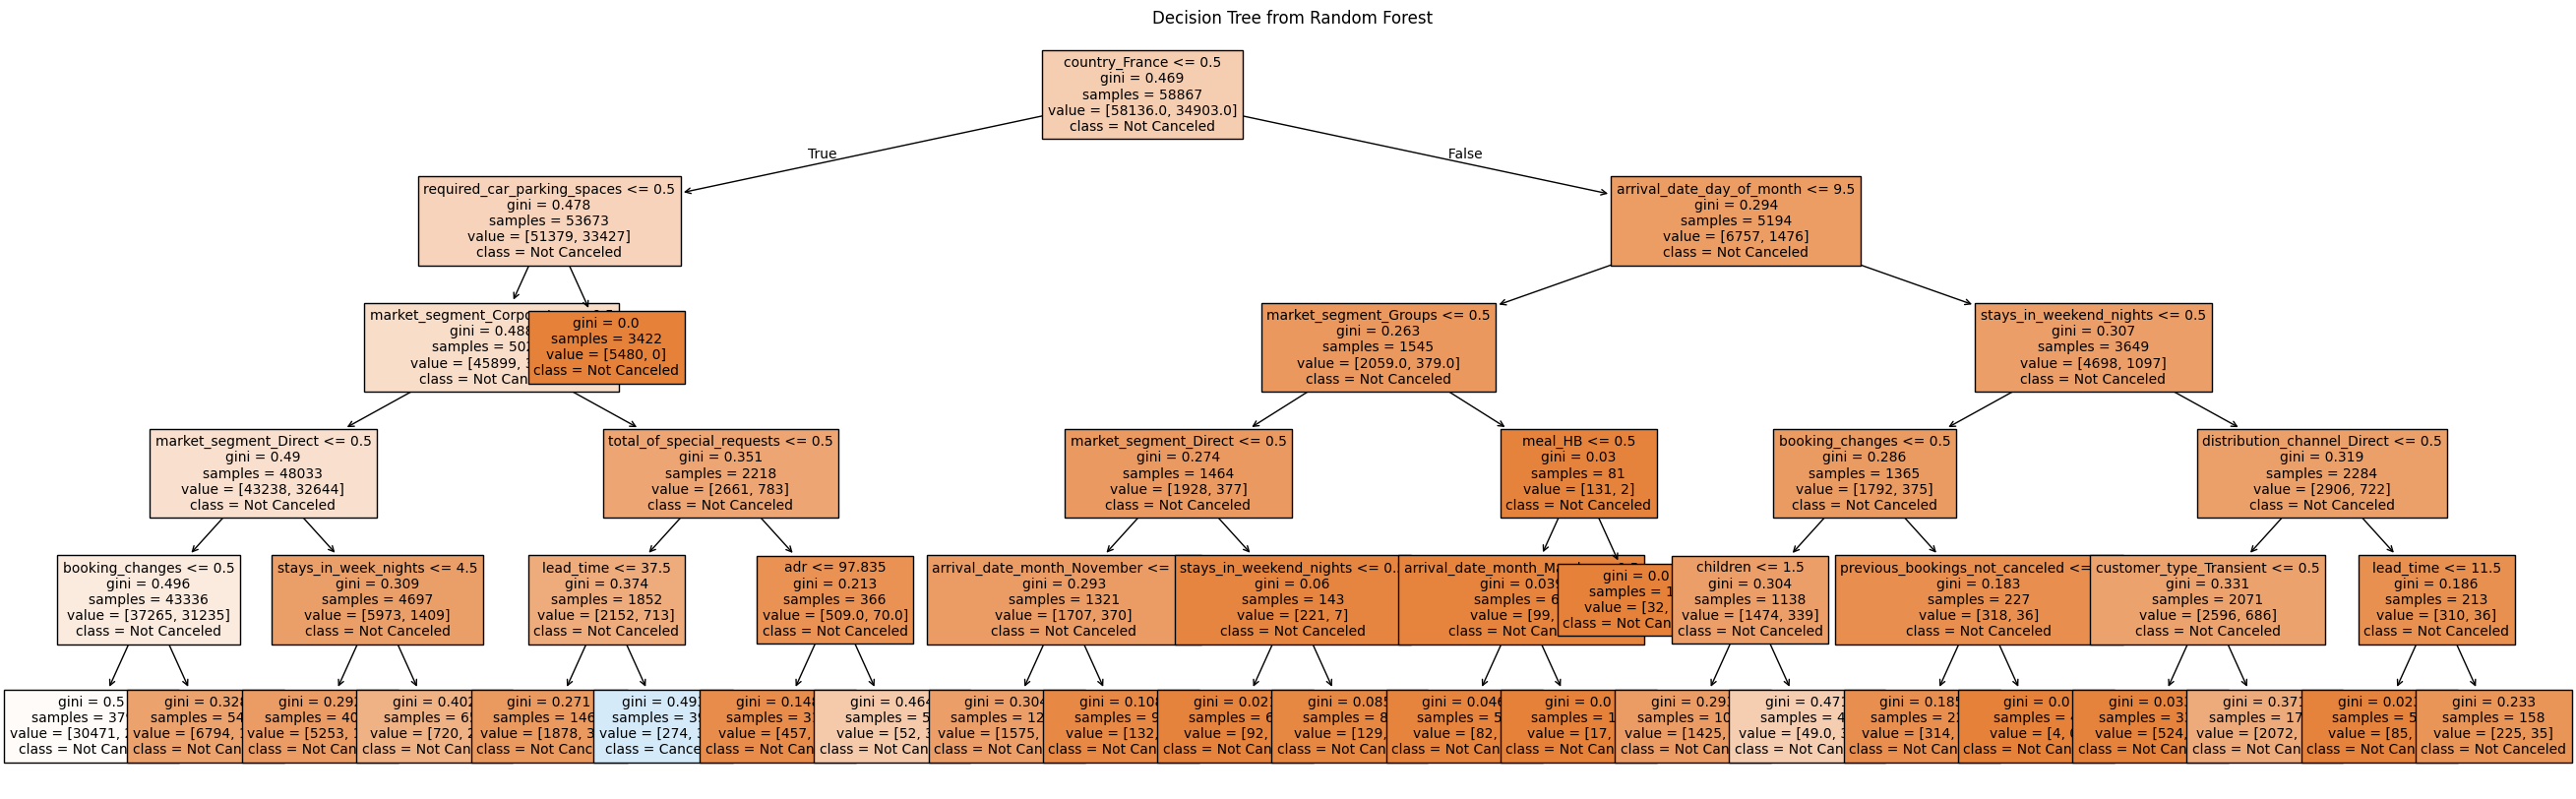

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(33, 10))
feature_names = list(X.columns)

plot_tree(
    rf_model.estimators_[0],
    class_names=["Not Canceled", "Canceled"],
    feature_names=feature_names,
    filled=True,
    fontsize=10
)
plt.title("Decision Tree from Random Forest")
plt.show()


The random forest tree has a depth of 5 and 22 leaves.

Accuracy: 0.7592003439380911

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     14478
           1       0.99      0.37      0.53      8782

    accuracy                           0.76     23260
   macro avg       0.86      0.68      0.69     23260
weighted avg       0.82      0.76      0.72     23260


Confusion Matrix:


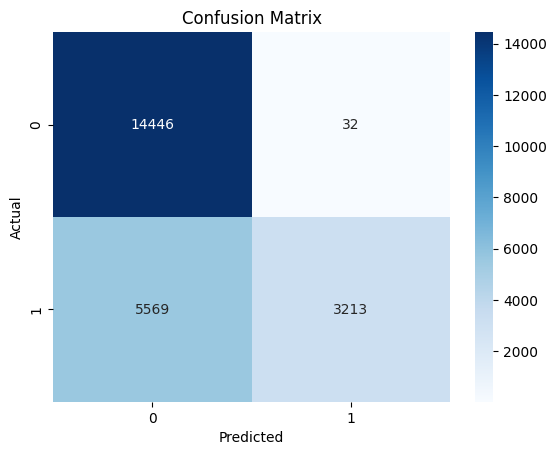

In [24]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

There was an accuracy of 0.7592 which is about 75.92%. This essentially means that our random forest tree was able to correctly predict cancellation rates for about 75.92% of the time on our testing data.

*   True Negatives (14446): The model was able to correctly identify 14446 bookings as not canceled
*   False Positives (32): The model incorrectly classified 32 bookings as canceled
*   False Negatives (5569): The model incorrectly classified 5569 bookings as not canceled
*   True Positives (3213): The model was able to correctly identify 3213 bookings as canceled




Precisions for canceled class:


*   Precision = TP / (TP + FP) = 0.99: Since precision shows us how many of the predicted canceled bookings were canceled, a 99% precision is very high and shows that there are very few false positives.
*   Recall = TP / (TP + FN) = 0.36: Since recall accounts for how many of the canceled bookings were correctly identified, a recall of 36% is low which can suggest that positive cases can be overlooked.



High accuracy which can confirm that the hyperparameters work well during cross-validation. Overall the Random Forest model preforms very well on this dataset, achieving perfect accuracy.
